In [109]:
import Pkg;
Pkg.add("Plots");
using Plots;

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [192]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
A = [rand() for x in xs]

10-element Array{Float64,1}:
 0.9802407992473423
 0.10732716732451686
 0.9310394726574003
 0.7809054025404405
 0.7022150015752624
 0.43570633301697104
 0.5477661561766529
 0.9449470784979186
 0.6545783594680077
 0.5472442908243655

In [193]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

In [194]:
# Zad 1

In [195]:
# Struktura do przechowywania współrzędnych punktów
struct Points
    xs
    ys
end

In [196]:
function (f::Points)(x)
    result = 0
        for q in 1:size(f.ys, 1)
            multi_tmp = 1;
            #liczymy dla kazdego wezla osobno iloraz poszczegolnych skladnikow (wedlug wzoru)
            for w in 1:size(f.xs, 1)
                if w != q
                    multi_tmp *= (x - f.xs[w])/(f.xs[q] - f.xs[w])
                end
            end
            #sumujemy je mnozac przez wartosc funkcji w poszczegolnych punktach
            result += multi_tmp * f.ys[q]
        end
    return result
end

In [197]:
function LagrangeInterpolation(xs, ys)
    return Points(xs, ys)
end

LagrangeInterpolation (generic function with 1 method)

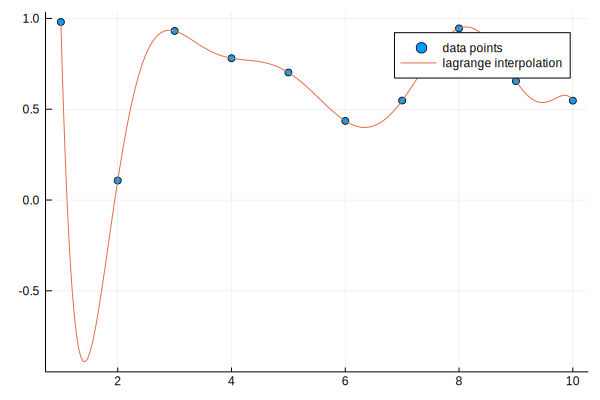

In [198]:
inter_lagrange = LagrangeInterpolation(xs, A)
B_lagrange=[inter_lagrange(x) for x in xsf]
scatter(xs, A, label="data points")
plot!(xsf, B_lagrange, label="lagrange interpolation")

In [199]:
# Zad 2

In [200]:
struct Newt
    x_coords
    a
end

In [222]:
function NewtonInterpolation(x_coords, y_coords)
    a = Array{Float64}(undef, size(y_coords, 1))
    # tablica zawierajaca i-ta przekatna tablicy ilorazow roznicowych
    r = Array{Float64}(undef, size(y_coords, 1))
    for i in 1:size(y_coords, 1)
        r[i] = y_coords[i]
        # wypełniamy i-ta przekntna od konca 
        for k in i-1:-1:1
            r[k] = (r[k+1] - r[k])/(x_coords[i]-x_coords[k])
        end
        # ostatnia wypelniona liczba to a[i]
        a[i] = r[1]
    end
    return Newt(x_coords, a)
end

NewtonInterpolation (generic function with 1 method)

In [223]:
function (f::Newt)(x)
    result = f.a[1]
    multi_tmp = 1
        for q in 2:size(f.a, 1)
            multi_tmp *= (x - f.x_coords[q - 1])
            result += (f.a[q] * multi_tmp)
        end
    return result 
end

In [224]:
# Zad 3

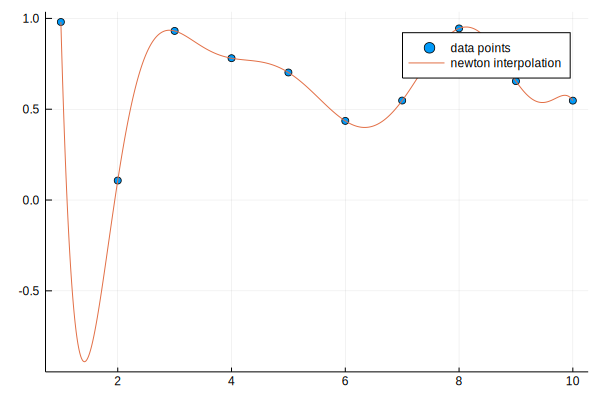

In [225]:
inter_newton = NewtonInterpolation(xs, A)
B_newton = [inter_newton(x) for x in xsf]
scatter(xs,A, label="data points")
plot!(xsf, B_newton, label="newton interpolation")

In [226]:
# Zad 4 

In [227]:
Pkg.add("Polynomials");

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


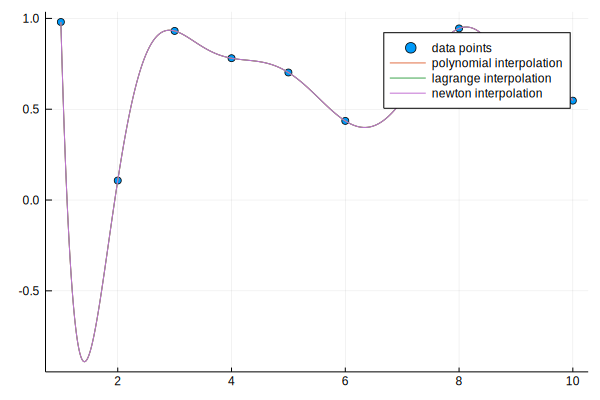

In [228]:
# interpolacja wielomianowa w pakiecie Polynomials
using Polynomials
fit1=polyfit(xs, A)
B=[fit1(x) for x in xsf]
scatter(xs, A, label="data points")
plot!(xsf, B, label="polynomial interpolation")
plot!(xsf, B_lagrange, label="lagrange interpolation")
plot!(xsf, B_newton , label="newton interpolation")

In [229]:
# W wyniku tych trzech interpolacji otrzymujemy taki sam wykres, bo interpolujemy po tym samym wielomianie

In [230]:
# Zad 5

In [231]:
import Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
using DataFrames
using CSV

function add_row(data_frame, time, name, size, poly)
    push!(data_frame.time, time)
    push!(data_frame.name, name)
    push!(data_frame.size, size)
    push!(data_frame.poly, poly)
end

x_coords =  1:1:10
y_coords = [rand() for x in xs]

dataFrame = DataFrame(time=Float64[], 
                      size=Int64[],
                      name=String[], 
                      poly=Bool[])

for size in 10:50:500
    xsf = 1:0.01:size
    for i in 1:10
        time = @elapsed NewtonInterpolation(x_coords, y_coords)
        add_row(dataFrame, time, "n", size, true)
        time = @elapsed polyfit(x_coords, y_coords)
        add_row(dataFrame, time, "p", size, true)
        lagrange = LagrangeInterpolation(x_coords, y_coords)
        newton = NewtonInterpolation(x_coords, y_coords)
        poly = polyfit(x_coords, y_coords)
        time = @elapsed [(lagrange)(x) for x in xsf]
        add_row(dataFrame, time, "l", size, false)
        time = @elapsed [(newton)(x) for x in xsf]
        add_row(dataFrame, time, "n", size, false)
        time = @elapsed [(poly)(x) for x in xsf]
        add_row(dataFrame, time, "p", size, false)
    end
end
CSV.write("wyniki.csv", dataFrame)



  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


"wyniki.csv"

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


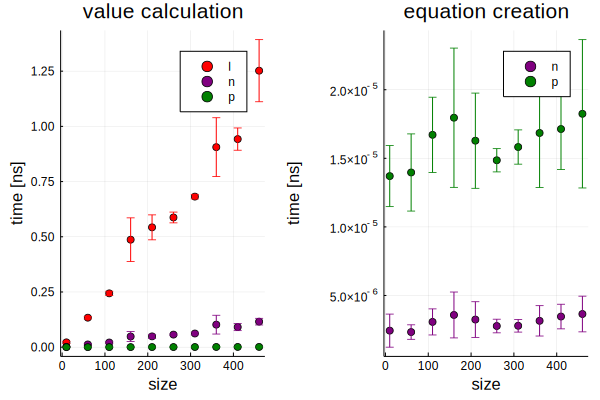

In [232]:
using DataFrames
using Pkg
Pkg.add("Statistics")
using Statistics
using CSV
using Plots
data=CSV.read("wyniki.csv", delim=",")
data_aggreagation=aggregate(data, [:name, :poly, :size], [mean, std])

names = ["l", "n", "p"]
colors = [:red, :purple, :green]
data_sets_by_name = []
for name in names
    push!(data_sets_by_name, filter(row->row[:name] == name, data_aggreagation))
end
scat = scatter(layout=2)
for i in 1:size(names, 1)
  scatter!(
    data_sets_by_name[i].size,
    data_sets_by_name[i].time_mean, 
    group=data_sets_by_name[i].poly, 
    label = names[i],
    title = ["value calculation" "equation creation"],
    colour = colors[i],
    yerr=data_sets_by_name[i].time_std, 
    layout=2,
    xlabel = "size", 
    ylabel = "time [ns]")  
end
scat

In [233]:
# Zad 6

In [234]:
x_coords =  1:1:10
y_coords = [rand() for x in x_points]
xsf=1:0.01:10

1.0:0.01:10.0

In [235]:
import Pkg
Pkg.add("Interpolations")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


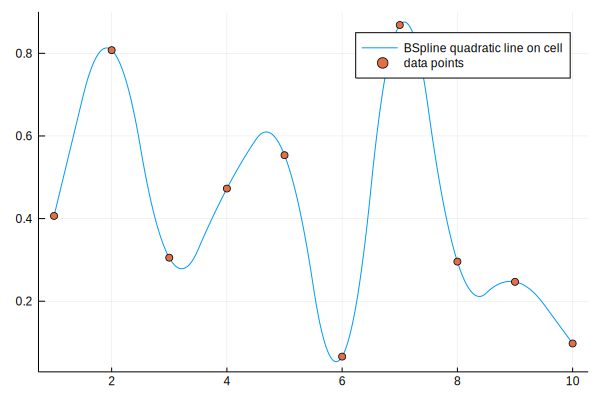

In [236]:
using Interpolations
itp = interpolate(y_coords, BSpline(Quadratic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic line on cell")
scatter!(x_coords,y_coords, label="data points")

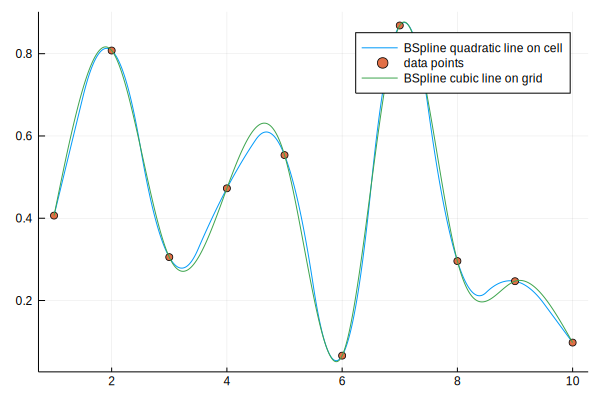

In [237]:
itp = interpolate(y_coords, BSpline(Cubic(Line(OnGrid()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline cubic line on grid")

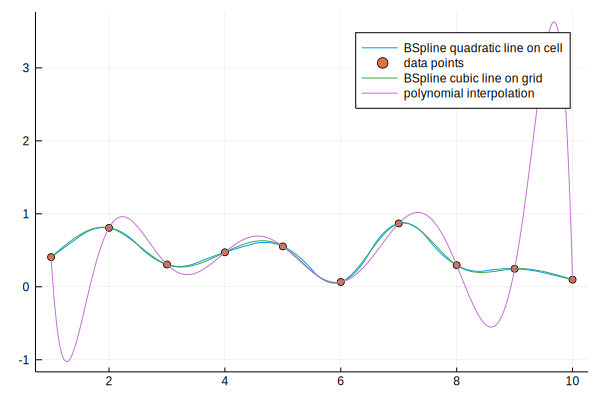

In [238]:
fit = polyfit(x_coords, y_coords)
polynomialB=[fit(x) for x in xsf]
plot!(xsf,polynomialB, label="polynomial interpolation")

In [239]:
# Splajn interpolacje budują bardzo podobne funkcje, które są
# gładsze od tych, które są tworzone za pomocą interpolacji 
# wielomianowej

In [240]:
# Zad 7

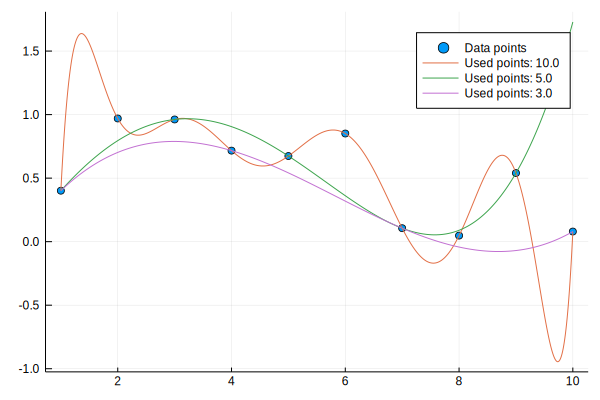

In [241]:
x_coords =  1:1:10
y_coords = [rand() for x in x_coords]
xsf=1:0.01:10

sc = scatter(x_coords, y_coords, label="Data points")

for i in 1:3
    fit=polyfit(x_coords[1:i:10], y_coords[1:i:10])
    polynomialB=[fit(x) for x in xsf]
    plot!(xsf,polynomialB, label=string("Used points: ", string(floor(10/i))))
end
sc

In [ ]:
# Pogorszenie jakości interpolacji wielomianowej, 
# mimo zwiększenia liczby jej węzłów, efekt Rungego. 
# Szczególnie to widać na końcach przedziału. 